## Tabular Q-Learning
This example will implement the tabular Q-Learning algorithm from scratch. This algorithm will train an agent to act on the Taxi Driver environment.
Q-Learning attempts to learn the value of taking a specific action in some state by holding a table that is updated at every iteraction with the environment.

Before start let's remember Q-learning algorithm has the following characteristics:
* Pure RL: No model of the environment is given to the agent, just rewards and states after some action
* Value-Based: Estimate the Q-value table values by interaction
* Off-Policy: Separate policy for training(e-greedy) and playing(greedy)
* Tabular: On this case there is no Neural-Network

![alt text](./imgs/Q_LearningSummary.png "Game")

### The Game
The taxi game is quite simple basically you pick up he passanger at the Blue letter and bring the the Cyan letter.
![alt text](./imgs/TaxiDriverAI.gif "Game")
The map is 5x5 and we have the following available states:
* Pickup
* Drop
* North, East, South, West
On the enviroment there will be 4 possible destinations (R,G,Y,B) and 5 passanger locations if you consider the state "inside the car". Also the enviroment gives -1 penalty of the taxi tries to go outside the maze. 

#### States
Considering the information above we will calculate our number of states with the following information:
* Grid_X, and Grid_Y (5x5)
* Possible Destinations (4)
* Possible Locations (5)
So totally we will have 5x5x5x4=500 states. 

### Q-Table
The Q table will hold an estimate of the value of every action on each state that gets better with more iterations.
Our Q-Table pre-initialized with zeros will look like this:
![alt text](./imgs/Q_Taxi_States.png "Q-Table")

### Q-Learning update equation
After each iteration with the environment you can update the table using the following equation:
![alt text](./imgs/FormulaExposed.png "Game")

### References
* https://en.wikipedia.org/wiki/Q-learning
* https://en.wikipedia.org/wiki/State–action–reward–state–action
* https://towardsdatascience.com/reinforcement-learning-with-python-8ef0242a2fa2
* https://github.com/MartinThoma/LaTeX-examples/tree/master/source-code/Pseudocode/q-learning
* https://github.com/dennybritz/reinforcement-learning
* http://www.wildml.com/2016/10/learning-reinforcement-learning/
* https://matplotlib.org/users/pyplot_tutorial.html
* https://gym.openai.com/envs/Taxi-v2/
* https://github.com/omerbsezer/Reinforcement_learning_tutorial_with_demo
* https://medium.com/@m.alzantot/deep-reinforcement-learning-demysitifed-episode-2-policy-iteration-value-iteration-and-q-978f9e89ddaa
* https://medium.freecodecamp.org/an-introduction-to-q-learning-reinforcement-learning-14ac0b4493cc
* https://towardsdatascience.com/my-journey-to-reinforcement-learning-part-1-q-learning-with-table-35540020bcf9
* https://github.com/openai/gym/wiki/Leaderboard

### Include libraries
On this example, basically we will need Numpy, OpenAI Gym, and Matplotlib

In [1]:
import gym
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

### Initialize Enviroment and Hyper-Parameters
This section will initialize the following things:
* OpenAI enviroment
* State Actions Value table (Q)
* Alpha,Gama,Epsilon Hyper-parameters
* Number of Episodes

In [2]:
# Init Taxi-V2 Env
print('OpenAI taxi environment')
env = gym.make("Taxi-v2")
#env = gym.make("FrozenLake-v0")
env.reset()
env.render()

# Initialize the state-action value(Q) table
q_table = np.zeros([env.observation_space.n, env.action_space.n])
print('Q-table shape: {}x{} intialized with zeros'.format(q_table.shape[0],q_table.shape[1]))

# Hyperparameters
alpha = 0.1 #0.8 0.2
gamma = 0.95 # 0.95 0.9
epsilon = 0.1

# Number of games played from start to end
num_episodes = 4000

# Save the sum of rewards and steps on each episode
arr_steps = np.zeros((num_episodes))
arr_rewards = np.zeros((num_episodes))

OpenAI taxi environment


/Users/leonardo_a/anaconda3/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Q-table shape: 500x6 intialized with zeros


### Q-Learning Value Update
Basically we need to apply this function to calculate the new value estimate on out state-action table. By the law of the large numbers, if we have enough iterations with the enviroment we will be able to have the optimum estimate.

#### Value Update
![alt text](./imgs/Q_learningUpdate.png "Value Update")

In [3]:
def Q_value_update(alpha, gamma, reward, old_value, next_state, Q_table):
    # Estimate of the optimal future value is the value of the action with biggest Q-Value
    estimate_fut_value = np.max(Q_table[next_state])

    # Value Update (We need to inject this value back to the Q-table)
    new_value = old_value + alpha * (reward + gamma * estimate_fut_value - old_value)
    return new_value

### Q-Learning training Loop
![alt text](./imgs/Q_loop.png "Game")



In [4]:
# Iterate num_episodes
for i in range(1, num_episodes):
    state = env.reset()

    # Init Vars
    steps, penalties, reward, = 0, 0, 0
    done = False

    # Run an episode from begining to end(With many steps)
    while not done:
        # Epsilon-Greedy, sometimes we play random, sometimes we play greedy
        if random.uniform(0, 1) < epsilon:
            # Sample something from the action space
            action = env.action_space.sample()
        else:
            # Just act greedly
            action = np.argmax(q_table[state])

        # Commincate with the enviroment (Act and get state, and rewards)
        next_state, reward, done, info = env.step(action)

        old_value = q_table[state, action]

        # Value-Iteration update
        q_table[state, action] = Q_value_update(alpha, gamma, reward, old_value, next_state, q_table)        

        state = next_state
        steps += 1
        
        # Save some information for graphs
        arr_rewards[i] += reward
    
    # Store the number of steps on the episode
    arr_steps[i] = steps 

    # Just display the current episode (Each episode could have multiple steps)
    if i % 100 == 0:
        print("Episode: {}/{}".format(i,num_episodes))
        clear_output(wait=True)

print("Training finished.")

Training finished.


### Display some training information

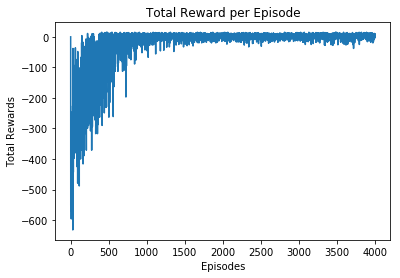

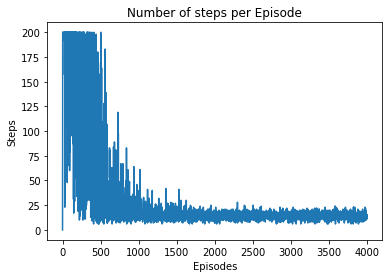

In [5]:
plt.plot(arr_rewards)
plt.title('Total Reward per Episode')
plt.ylabel('Total Rewards')
plt.xlabel('Episodes')
plt.show()

plt.plot(arr_steps)
plt.title('Number of steps per Episode')
plt.ylabel('Steps')
plt.xlabel('Episodes')
plt.show()

### Agent after training
After we have our Q-table complete we can just act greedly and get the action with maximim expected future reward

In [6]:
state = env.reset()
done = False
step = 0
while not done:
    action = np.argmax(q_table[state])
    next_state, reward, done, info = env.step(action)
    state = next_state
    step += 1
    print("Step: {}".format(step))
    env.render()
    clear_output(wait=True)
    time.sleep(0.2)

Step: 10
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)


### Frozen Lake Environment
Now we're going to try the same algorithm on the FrozenLake environment. 
![alt text](./imgs/FrozenIlustration.png "Game")
Here we have a 4x4 grid where the agent start at state S and finish at state G. The available actions are (UP/DOWN/LEFT/RIGHT).
![alt text](./imgs/NotSlipperyFrozenLake.png "Game")
On a normal grid you just need to do: (D,D,R,R,D,R). But the lake is frozen and your actions might make you land on another state. (Stochastic Environment)


### Register the Not Frozen Environment
On this case the actions will not be stochastic.

In [7]:
from gym.envs.registration import register
register(
    id='FrozenLakeNotSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': False},
    max_episode_steps=2000,
    reward_threshold=0.78, # optimum = .8196
)

### Initialize Enviroment and Hyper-Parameters
This section will initialize the following things:
* OpenAI enviroment
* State Actions Value table (Q)
* Alpha,Gama,Epsilon Hyper-parameters
* Number of Episodes

In [12]:
# Create environment and Q-table
env = gym.make('FrozenLake-v0')
env.seed(0)
np.random.seed(56776)

# Initialize the state-action value(Q) table
q_table = np.zeros([env.observation_space.n, env.action_space.n])
print('Q-table shape: {}x{} intialized with zeros'.format(q_table.shape[0],q_table.shape[1]))

# -- hyper --
num_episodes = 20000
alpha = 0.1
gamma = 0.8
epsilon = 0.7

# Save the sum of rewards and steps on each episode
arr_steps = np.zeros((num_episodes))
arr_rewards = np.zeros((num_episodes))

Q-table shape: 16x4 intialized with zeros


### Q-Learning training Loop

In [13]:
# Iterate num_episodes
for i in range(1, num_episodes):
    
    state = env.reset()
    # Init Vars
    steps, penalties, reward, = 0, 0, 0
    done = False

    # Run an episode from begining to end(With many steps)
    while not done:
        # Epsilon-Greedy, sometimes we play random, sometimes we play greedy
        if random.uniform(0, 1) < epsilon:
            # Sample something from the action space
            action = env.action_space.sample()
        else:
            # Just act greedly
            action = np.argmax(q_table[state])
            
        # Commincate with the enviroment (Act and get state, and rewards)
        next_state, reward, done, info = env.step(action)
        
        old_value = q_table[state,action]
        q_table[state,action] = Q_value_update(alpha, gamma, reward, old_value, next_state, q_table)        
        state = next_state   
        steps += 1
        
        # Save some information for graphs
        arr_rewards[i] += reward
    
    # Store the number of steps on the episode
    arr_steps[i] = steps 

    # Just display the current episode (Each episode could have multiple steps)
    if i % 100 == 0:
        print("Episode: {}/{}".format(i,num_episodes))
        clear_output(wait=True)

print(np.argmax(q_table,axis=1))
print(np.around(q_table,6))
print('-------------------------------')

[1 1 0 3 0 0 1 0 3 1 0 0 0 2 1 0]
[[0.018438 0.022404 0.019734 0.017874]
 [0.014385 0.024426 0.017597 0.02176 ]
 [0.042323 0.031833 0.034847 0.025666]
 [0.021421 0.017859 0.014468 0.027246]
 [0.04124  0.031677 0.031767 0.013312]
 [0.       0.       0.       0.      ]
 [0.073578 0.094112 0.081842 0.010714]
 [0.       0.       0.       0.      ]
 [0.025065 0.061213 0.048726 0.093585]
 [0.10761  0.18898  0.1572   0.082314]
 [0.281907 0.219819 0.188252 0.055441]
 [0.       0.       0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.121911 0.202134 0.257769 0.193339]
 [0.301687 0.581383 0.522835 0.298602]
 [0.       0.       0.       0.      ]]
-------------------------------


### Display some training information

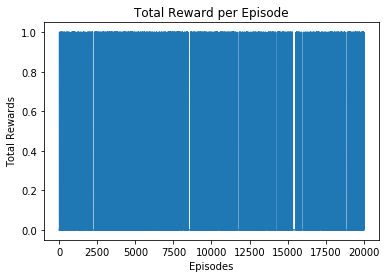

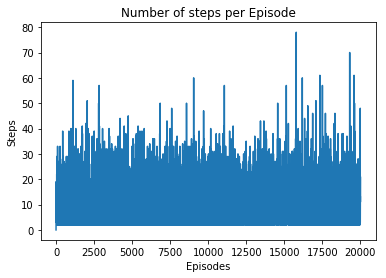

In [14]:
plt.plot(arr_rewards)
plt.title('Total Reward per Episode')
plt.ylabel('Total Rewards')
plt.xlabel('Episodes')
plt.show()

plt.plot(arr_steps)
plt.title('Number of steps per Episode')
plt.ylabel('Steps')
plt.xlabel('Episodes')
plt.show()

### Agent after training

In [17]:
state = env.reset()
done = False
step = 0
while not done:
    action = np.argmax(q_table[state])
    next_state, reward, done, info = env.step(action)
    state = next_state
    step += 1
    print("Step: {}".format(step))
    env.render()
    clear_output(wait=True)
    time.sleep(0.2)

Step: 25
  (Down)
SFFF
FHFH
FFFH
HFFG
